## Estadistica Aplicada
Actividad 5

Jesus Adrian Cordero Hernandez 1952778

Gpo 41

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# *Problema 3*

In [52]:
datos= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')
datos.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


In [53]:
## 3.a) Ajuste un modelo de supervivencia exponencial
exp= ExponentialFitter().fit(datos['tiempo'],datos['quebrar'])
exp.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

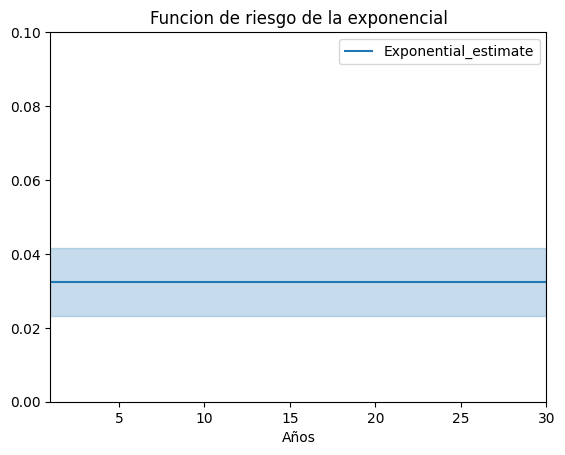

In [54]:
## 3.b) Grafique la función de riesgo exponencial
exp.plot_hazard()
plt.xlim(1,30)
plt.ylim(0,.1)
plt.title('Funcion de riesgo de la exponencial')
plt.xlabel('Años');

In [55]:
## 3.c) Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial

**Segun la funcion exponencial, el riesgo de que una empresa quiebre a lo largo del tiempo es constante**

# *Problema 4*

In [56]:
## 4.a) Ajuste un modelo Weibull de supervivencia
weibull= WeibullFitter().fit(datos['tiempo'],datos['quebrar'])
weibull.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

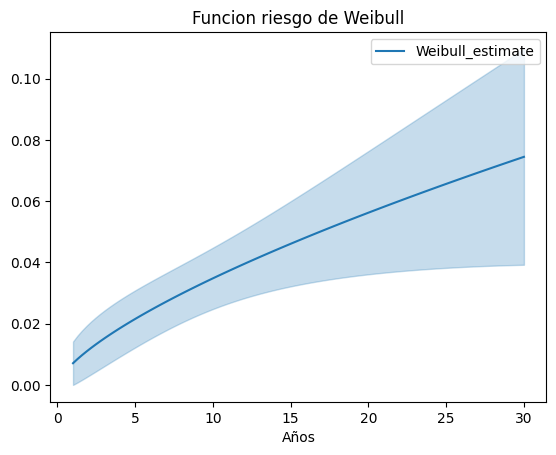

In [57]:
## 4.b) Grafique la función de riesgo
weibull.plot_hazard()
plt.title('Funcion riesgo de Weibull')
plt.xlabel('Años');

In [58]:
## 4.c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

**Es de forma ascendente esto quiere decir que mientras mas avanza el tiempo mayor es el riego de que la empresa quiebre**

# *Problema 5*

In [59]:
## 5.a) Ajuste un modelo Log-Normal
logn= LogNormalFitter().fit(datos['tiempo'],datos['quebrar'])
logn.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -210.44
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.02       0.13             2.78             3.27
sigma_   0.99       0.10             0.79             1.19

         cmp to     z      p   -log2(p)
mu_        0.00 24.04 <0.005     421.80
sigma_     1.00 -0.11   0.91       0.14
---
AIC = 424.87

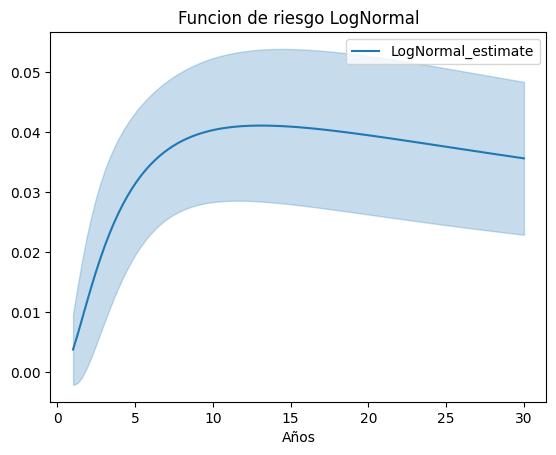

In [60]:
## 5.b) Grafique la función de riesgo 
logn.plot_hazard()
plt.title('Funcion de riesgo de LogNormal')
plt.title('Funcion de riesgo LogNormal')
plt.xlabel('Años');

In [61]:
## 5.c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

**A simple vista observamos que del año 1 al 10 el riego es creciente, se mantiene constante por algunos momentos y despues del año 15 el riesgo es decreciente**

# *Problema 6*

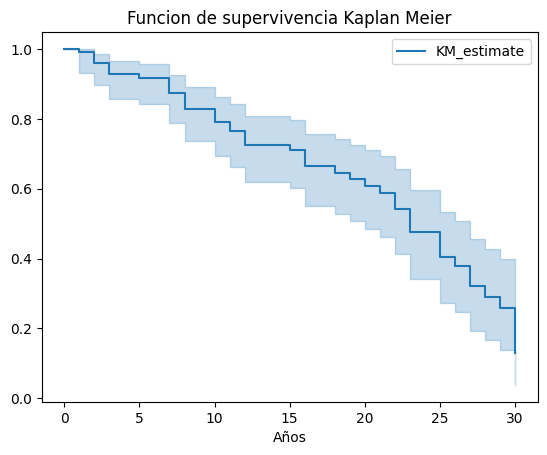

In [62]:
## 6.a) Estime la función de supervivencia y la mediana de tiempo de supervivencia y diga que significa.
kapl= KaplanMeierFitter().fit(datos['tiempo'],datos['quebrar'])
kapl.plot_survival_function()
plt.title('Funcion de supervivencia Kaplan Meier')
plt.xlabel('Años');

In [63]:
kapl.median_survival_time_

23.0

Significa que en el tiempo 23 la mitad de las empresas habrán quebrado

In [64]:
## 6.b) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False)y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.
hombres = datos.query('mujer==0')
mujeres = datos.query('mujer==1')
kap_hom = KaplanMeierFitter().fit(hombres['tiempo'],hombres['quebrar'])
kap_muj = KaplanMeierFitter().fit(mujeres['tiempo'],mujeres['quebrar'])

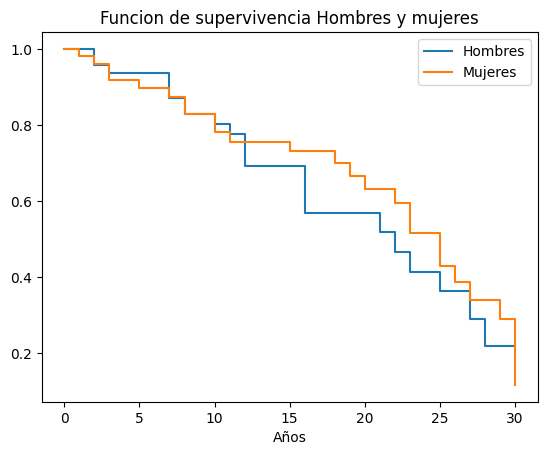

In [65]:
kap_hom.plot_survival_function(ci_show=False, label='Hombres')
kap_muj.plot_survival_function(ci_show=False, label='Mujeres')
plt.title('Funcion de supervivencia Hombres y mujeres')
plt.xlabel('Años');

In [66]:
## 6.c) El profesor cree que las empresas fundadas por hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

$H0= S(1) = S(2)$ 

$H1= S(1)\neq S(2)$ 

In [67]:
LRT = logrank_test(hombres['tiempo'],mujeres['tiempo'],hombres['quebrar'],mujeres['quebrar'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

Como podemos observar el p valor es mayor al estadistico de prueba por lo que NO rechazamos h0 y esto nos quiere decir que las empresas fundadas por hombres NO quiebran mas rapido